<a href="https://colab.research.google.com/github/vahadruya/Capstone-Project-Unsupervised-ML-Topic-Modelling/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Global Terrorism Dataset



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name - Aditya A P**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/Input data/'
df = pd.read_csv(path + 'Global Terrorism Data.csv', encoding = 'ISO-8859-1')

<ipython-input-3-f4a11e6ffacd>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + 'Global Terrorism Data.csv', encoding = 'ISO-8859-1')


In [4]:
sns.set()

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns  in the dataset: {df.shape[1]}')

Number of rows in the dataset: 181691
Number of columns  in the dataset: 135


### Dataset Information

In [7]:
# Dataset Info
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'Number of duplicated rows in the dataset: {df.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


It is expected that **eventid** column should have all unique values, as it represents a unique event of terrorism.

In [9]:
df['eventid'].duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(f'There are {df.isna().sum().sum()} missing values in the dataset\n\nThe columns which have missing values are:')
dfna = df.isna().sum()
print(dfna[dfna != 0])

There are 13853997 missing values in the dataset

The columns which have missing values are:
approxdate    172452
resolution    179471
provstate        421
city             434
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


<Axes: >

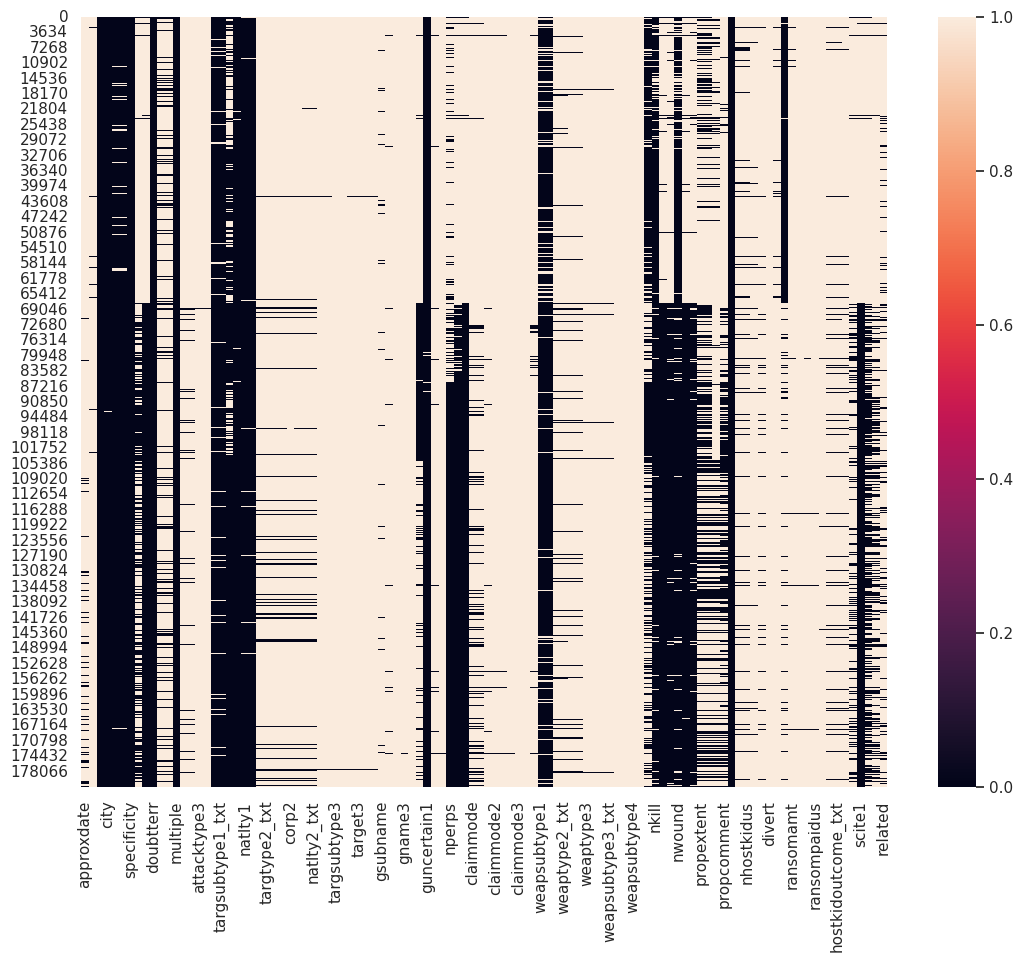

In [11]:
# Visualizing the missing values of only columns with missing values
plt.figure(figsize = (13, 10))
sns.heatmap(df[dfna[dfna != 0].index].isna())

### What did you know about your dataset?

On a first look at the dataset, it is found that
*   There are **181691 rows and 135 columns**, out of which one is **eventid**, which is a primary key to the dataset.
*   There are **no duplicated data** in the dataset, and all values in **eventid** column are **unique**
*   There are **several missing values** in the dataset, since many of the columns are markers or counters which display null values when not necessary.
*   Due to the extremely large width of the dataset, only necessary columns will be chosen based on intelligent selection for Data Analysis. Null values shall be dealt with on this select features only.

## **2. Understanding Your Variables**

Since there are several columns in the dataset, it is cumbersome to analyse each of them in this section. Instead, part of **Data Wrangling** shall be done here so that only certain variables (deemed important for a proper EDA of the dataset) shall be selected.

First, those columns are filtered out which contain a large number of missing values (~15-20% of the column)

In [31]:
# Computing the percentage of missing values in each column
dfnan = df.isna().sum()*100/df.shape[0]

# Printing columns with less than 15% missing values
dfnan[dfnan < 15].index

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [32]:
# Selecting necessary columns for EDA
cols = [
        'eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
        'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt',
        'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'extended'
       ]

data = df[cols].copy()

# Renaming columns appropriately
col_rename = {
              'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'gname':'group',
              'provstate':'state', 'attacktype1_txt':'attack_type', 'targtype1_txt':'target', 'weaptype1_txt':'weapon_type'
             }

data.rename(columns = col_rename, inplace = True)

*   Out of the above selected columns, the following are used only for referencing or when studying particular/specific cases, and are not primarily involved in the EDA:
  *   **month**
  *   **day**
  *   **provstate**
  *   **city**
  *   **latitude**
  *   **longitude**


In [33]:
# New missing values Count
print(f'There are {data.isna().sum().sum()} missing values in the new dataset\n\nThe columns which have missing values are:')
dfna = data.isna().sum()
print(dfna[dfna != 0])

There are 36592 missing values in the new dataset

The columns which have missing values are:
state          421
city           434
latitude      4556
longitude     4557
nkill        10313
nwound       16311
dtype: int64


In [34]:
# Dataset Columns
data.columns

Index(['eventid', 'year', 'month', 'day', 'country', 'region', 'state', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attack_type', 'target',
       'group', 'weapon_type', 'nkill', 'nwound', 'extended'],
      dtype='object')

In [121]:
# Dataset Describe
data.describe()

,eventid,year,month,day,latitude,longitude,success,suicide,nkill,nwound,extended
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668,0.045346
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392,0.208063
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,1.000000


### Variables Description

The **[Global Terrorism Dataset](https://www.start.umd.edu/gtd/)** (or GTD for short) contains information on approximately 2,00,000 terrorist events across the globe spanning several years. Since the dataset is vast in terms of features for each terrorist event, only select features are considered here for EDA, and only their descriptions are provided below. Detailed description of each feature can be found in this [document](https://drive.google.com/file/d/1TLRkQDyLStykrjifbCqoMNVlXuk3LBAn/view?usp=sharing):

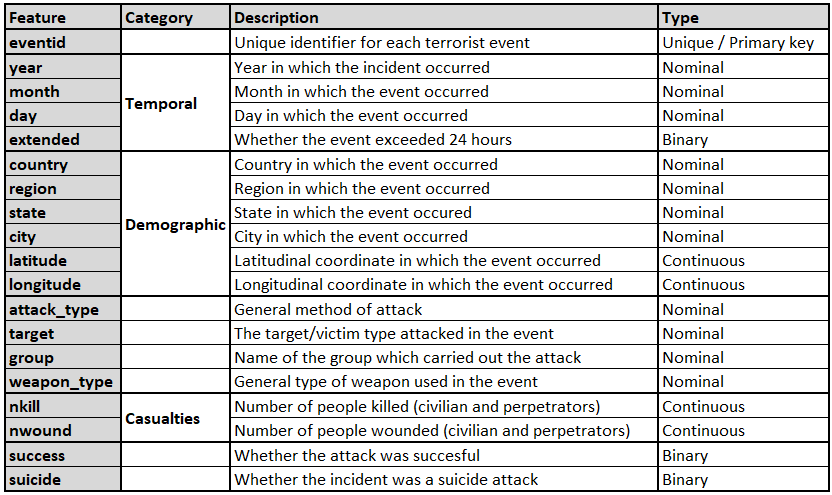

### Check Unique Values for each variable.

In [122]:
# Check Unique values for primary categorical variables
vars = ['year', 'extended', 'country', 'success', 'suicide', 'attack_type', 'target', 'group', 'weapon_type']
for var in vars:
  to_print = 5
  suff = f'etc.. {data[var].nunique()} values' if data[var].nunique() > to_print else ''
  print(f'Unique values in "{var}" are: {sorted(data[var].unique())[:to_print]} {suff}')

Unique values in "year" are: [1970, 1971, 1972, 1973, 1974] etc.. 47 values
Unique values in "extended" are: [0, 1] 
Unique values in "country" are: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'] etc.. 205 values
Unique values in "success" are: [0, 1] 
Unique values in "suicide" are: [0, 1] 
Unique values in "attack_type" are: ['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking'] etc.. 9 values
Unique values in "target" are: ['Abortion Related', 'Airports & Aircraft', 'Business', 'Educational Institution', 'Food or Water Supply'] etc.. 22 values
Unique values in "group" are: ['1 May', '14 K Triad', '14 March Coalition', '14th of December Command', '15th of September Liberation Legion'] etc.. 3537 values
Unique values in "weapon_type" are: ['Biological', 'Chemical', 'Explosives', 'Fake Weapons', 'Firearms'] etc.. 12 values


It can be roughly observed that the dataset contains information of terrorist attacks
* from **1970 to 2017**
* of **3537** distinct **organisations**
* using **various methods of attack** (such as **Bombing** and **Hijacking**)
* and a variety of **weapons** (such as **Explosives** and **Firearms**).
* The organisations also had quite a range of **targets** from **Airports** to **Educational Institutions**, some of them involving suicide attacks.

## **3. Data Wrangling**

Part of **Data Wrangling** has already been performed in the previous section in order to trim down the large number of variables. In this section, (FILL)

### 1. Handling missing values

*   As stated earlier, the dataset is segregated into two - **primary** and **secondary** features. Out of the total 19 columns, 6 are secondary and has been selected as a reference which may be useful only for a secondary EDA, and not primarily. Hence, none of the missing values from the secondary columns have to be imputed, which preserves data.
*  Hence, out of the 6 columns which contain missing values, only two are left which are primary variables - viz., **nkill** and **nwound**.

In [35]:
print('Missing values in nkill and nwound:')
print(data[['nkill', 'nwound']].isna().sum())

tot_rows = data.shape[0]
n_rows = data.dropna(subset = ['nkill', 'nwound']).shape[0]
print('\nNumber of rows of data lost on dropping these null values:', end = ' ')
print(f'{tot_rows - n_rows} or {round((tot_rows - n_rows)*100/tot_rows, 2)}%')

Missing values in nkill and nwound:
nkill     10313
nwound    16311
dtype: int64

Number of rows of data lost on dropping these null values: 16874 or 9.29%


In [83]:
# # Plotting number of terrorist events after dropping NA of nkill and nwound
# plt.figure(figsize = (11,6))
# data['year'].value_counts().sort_index().plot(label = 'With NA of nkill and nwounded', marker = 'o', markersize = 3)
# data.dropna(subset = ['nkill', 'nwound'])['year'].value_counts().sort_index().plot(label = 'Dropping NA of nkill and nwounded', marker = 'o', markersize = 3)
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('Number of terrorist events')
# plt.show()

def line_plots(num_plots, to_plot_dfs, titles, names = [None]):
  to_plot = []
  for i in range(num_plots):
    to_plot.append(go.Scatter(x = to_plot_dfs[i].index, y = to_plot_dfs[i].values, mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8), name = names[i]))
  fig = go.Figure(data = to_plot)
  fig.update_layout(title = titles[0], xaxis_title = titles[1], yaxis_title = titles[2], autosize = False, width = 1100, height = 600)
  fig.show()

to_plot = [data['year'].value_counts().sort_index(), data.dropna(subset = ['nkill', 'nwound'])['year'].value_counts().sort_index()]
legends = ['With NA of nkill and nwounded', 'Dropping NA of nkill and nwounded']
titles = ['Terrorist events with time - dropping and keeping NA values of nkill and nwound', 'Year', 'Number of events']
line_plots(2, to_plot, titles, legends)

*   It can be seen that there is signifcant loss of data on dropping the null values of **nkill** and **nwound** (~9.3%) which is also reflected in a drop of terrorist activities across each year.
*   Since each row in the dataset corresponds to a terrorist event, any loss of information will have crucial effects in the analysis. Also, imputation of these missing values with any other value does not seem logical since (as per the document linked) "***this field remains blank when the figure is not reported or it is too vague to be of use***"
*   Hence, these null values shall not be dropped or tampered with, and the entire dataset will be used whenever **nkill** and **nwound** are not included for analysis, while these null values will be ignored when the same 2 variables will be used for EDA.

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

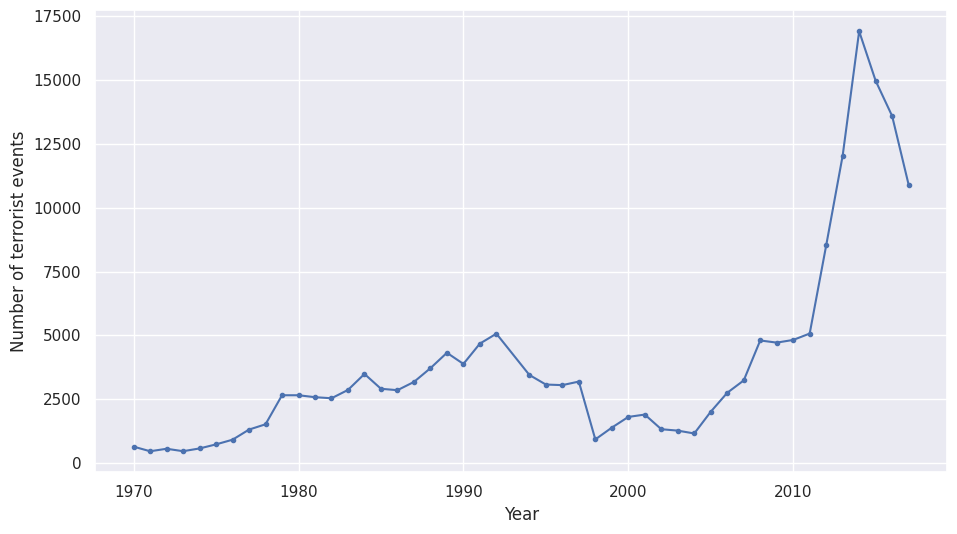

In [84]:
plt.figure(figsize = (11,6))
data['year'].value_counts().sort_index().plot(marker = 'o', markersize = 3)
plt.xlabel('Year')
plt.ylabel('Number of terrorist events')
plt.show()

In [85]:
yearly_df = data['year'].value_counts().sort_index()
titles = ['Terrorist events with time', 'Year', 'Number of events']
line_plots(1, [yearly_df], titles)

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***